In [1]:
%reload_ext autoreload
%autoreload 2
# %matplotlib widget
%matplotlib notebook

In [8]:
from load_and_aggregate_height import *
from geo_scripts.process_height import *
import matplotlib.pyplot as plt
import geopandas

In [3]:
precip_data = gr.from_file(os.path.expanduser("~/Downloads/datasets/chelsea/CHELSA_bio10_12.tif"))


In [5]:
# get the chelsea data mask to be used as the main ocean mask
x_ranges = list(gen_ranges(-180, 180, 1))
y_ranges = list(gen_ranges(90, -90, 1))
slices = get_slices(precip_data, x_ranges, y_ranges)
precip_ag = aggregate_slices(slices, filter_masked)
chelsea_mask = precip_ag.mask

<IPython.core.display.Javascript object>


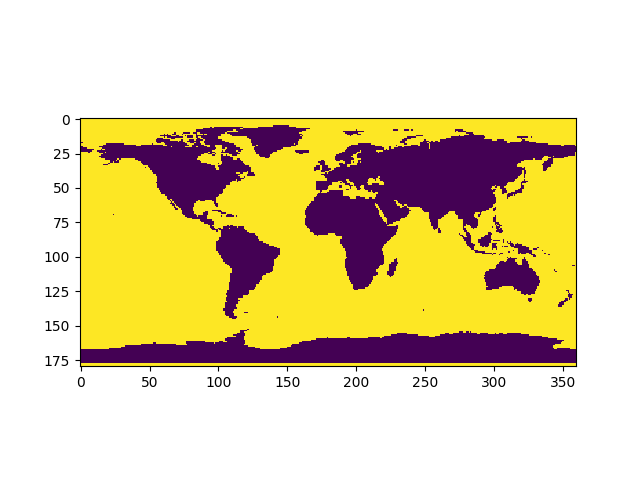

In [6]:
plt.imshow(chelsea_mask)

In [10]:
# load shapefiles
water_shape = geopandas.read_file(os.path.expanduser("~/Downloads/datasets/natural_earth/ne_50m_ocean/ne_50m_ocean.shp"))
df_river = geopandas.read_file(os.path.expanduser("~/Downloads/datasets/natural_earth/ne_50m_rivers_lake_centerlines_scale_rank/ne_50m_rivers_lake_centerlines_scale_rank.shp"))
df_lake = geopandas.read_file(os.path.expanduser("~/Downloads/datasets/natural_earth/ne_50m_lakes/ne_50m_lakes.shp"))
df_lake_historic = geopandas.read_file(os.path.expanduser("~/Downloads/datasets/natural_earth/ne_50m_lakes_historic/ne_50m_lakes_historic.shp"))


In [12]:
raster_1 = get_global_raster(1)
river_rasterized = rasterize_shapefile(df_river, raster_1)
ocean = rasterize_shapefile(water_shape, raster_1)

lake_r = rasterize_shapefile(df_lake, raster_1)
lake_h_r = rasterize_shapefile(df_lake_historic, raster_1)

[180 360]


<IPython.core.display.Javascript object>


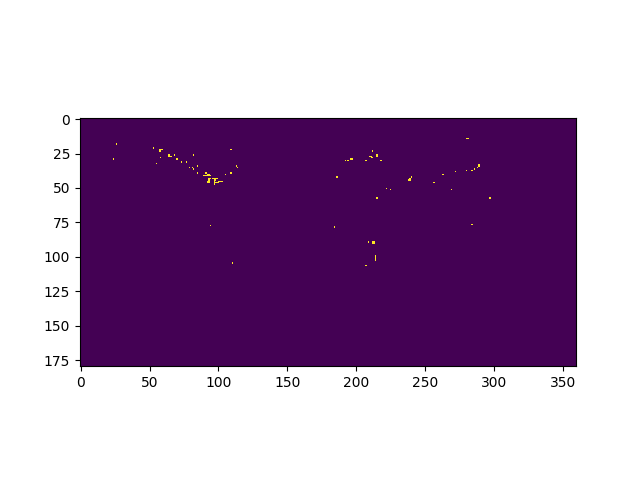

In [13]:
plt.imshow(lake_r)

In [22]:
# clip out the caspian sea
n = 41
s = 54
e = 234
w = 226
area_mask = np.zeros(lake_r.shape, dtype=np.bool)
area_mask[n:s,w:e] = True
sea_mask = ocean & area_mask

<IPython.core.display.Javascript object>


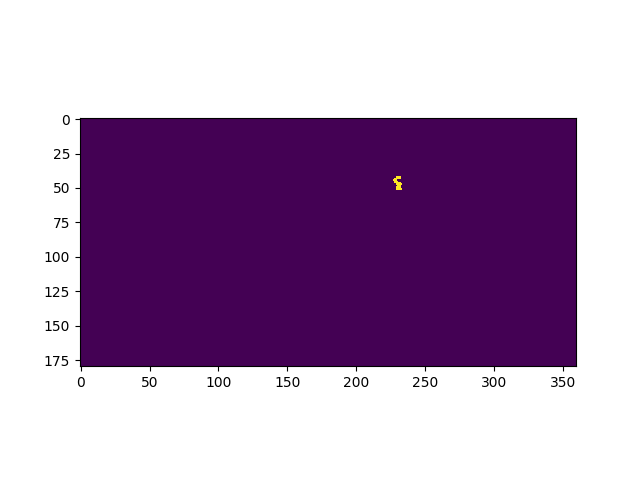

In [23]:
plt.imshow(sea_mask)

In [24]:
underwater = chelsea_mask | lake_r | lake_h_r | sea_mask

<IPython.core.display.Javascript object>


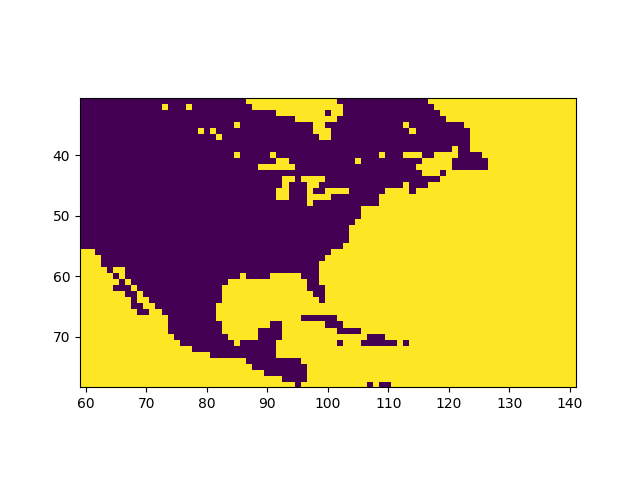

In [26]:
plt.imshow(underwater)